In [1]:
pip install yfinance matplotlib


[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

def fetch_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

def plot_stock_data(data, ticker):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], label=f'{ticker} Closing Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title(f'{ticker} Stock Price')
    plt.legend()
    plt.grid()
    plt.show()

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-23  138.119995  143.320007  137.899994  141.110001  140.700272   
2023-01-24  140.309998  143.160004  140.300003  142.529999  142.116135   
2023-01-25  140.889999  142.429993  138.809998  141.860001  141.448090   
2023-01-26  143.169998  144.250000  141.899994  143.960007  143.541992   
2023-01-27  143.160004  147.229996  143.080002  145.929993  145.506256   

              Volume  
Date                  
2023-01-23  81760300  
2023-01-24  66435100  
2023-01-25  65799300  
2023-01-26  54105100  
2023-01-27  70555800  


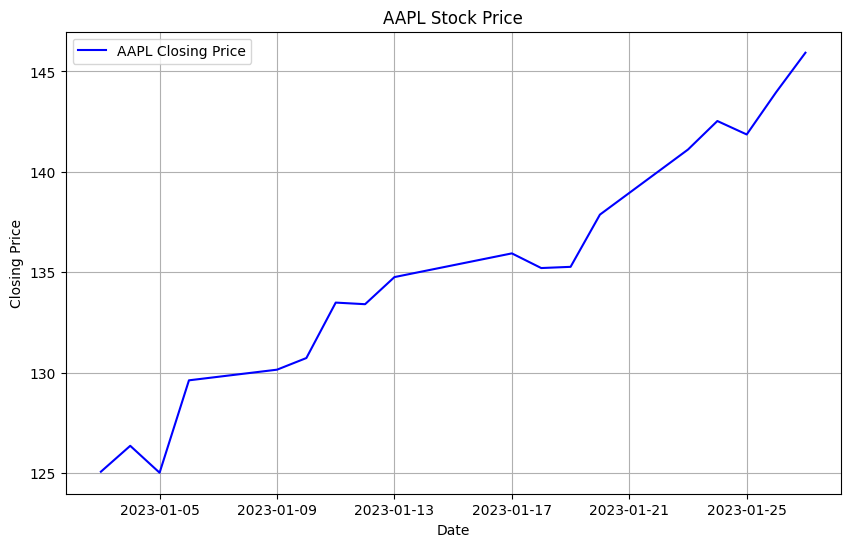

In [5]:
    ticker = 'AAPL'  # Replace 'AAPL' with any stock ticker you want to fetch
    start_date = '2023-01-01'
    end_date = '2023-01-28'

    stock_data = fetch_stock_data(ticker, start_date, end_date)
#     print(stock_data.tail())  # Print the last few rows of the data fetched

    plot_stock_data(stock_data, ticker)

In [6]:
def calculate_moving_averages(data, window_sizes):
    moving_averages = {}
    for window_size in window_sizes:
        column_name = f'{window_size}MA'
        data[column_name] = data['Close'].rolling(window=window_size).mean()
        moving_averages[window_size] = column_name
    return moving_averages

In [7]:
def plot_stock_data_moving_averages(data, ticker, moving_averages):
    plt.figure(figsize=(12, 8))

    # Plot stock's closing price
    plt.plot(data.index, data['Close'], label=f'{ticker} Closing Price', color='blue')

    # Plot moving averages
    for window_size, column_name in moving_averages.items():
        plt.plot(data.index, data[column_name], label=f'{window_size}-day MA', alpha=0.7)

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'{ticker} Stock Price with Moving Averages')
    plt.legend()
    plt.grid()
    plt.show()

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-06-26  186.830002  188.050003  185.229996  185.270004  185.270004   
2023-06-27  185.889999  188.389999  185.669998  188.059998  188.059998   
2023-06-28  187.929993  189.899994  187.600006  189.250000  189.250000   
2023-06-29  189.080002  190.070007  188.940002  189.589996  189.589996   
2023-06-30  191.630005  194.479996  191.259995  193.970001  193.970001   

              Volume        10MA      20MA        30MA  
Date                                                    
2023-06-26  48088700  184.989998  181.9530  178.975334  
2023-06-27  50730800  185.416998  182.5845  179.491667  
2023-06-28  51216800  186.010999  183.1820  180.064334  
2023-06-29  46347300  186.574998  183.7990  180.648333  
2023-06-30  85069600  187.370999  184.4930  181.357667  


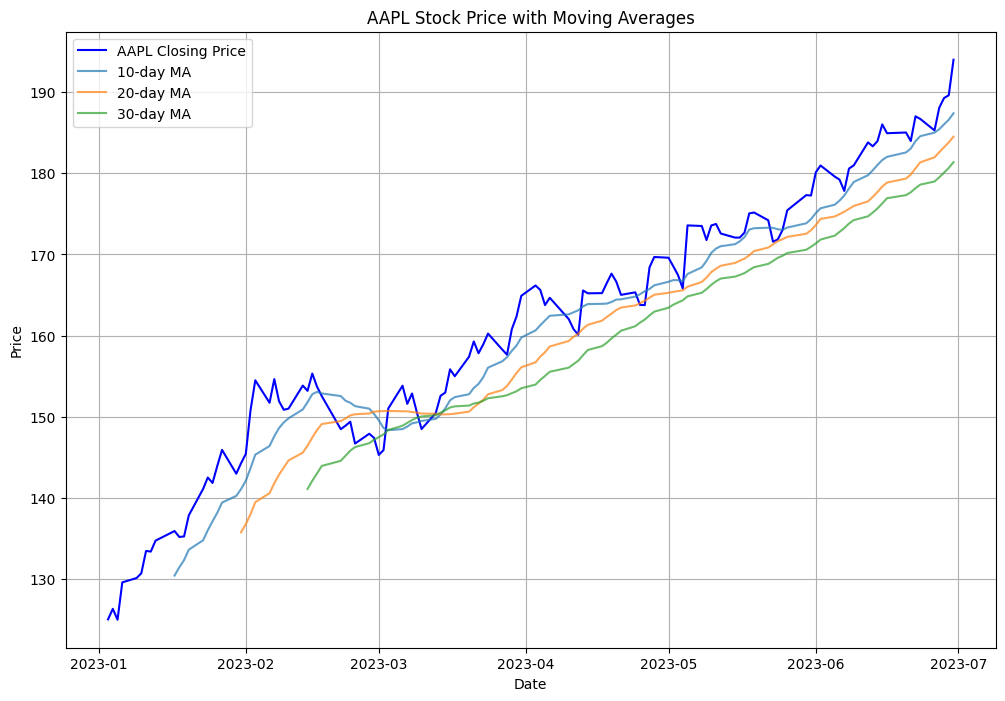

In [11]:
    ticker = 'AAPL'  # Replace 'AAPL' with any stock ticker you want to fetch
    start_date = '2023-01-01'
    end_date = '2023-07-01'
    window_sizes = [10, 20, 30]  # List of moving average window sizes

    stock_data = fetch_stock_data(ticker, start_date, end_date)
#     print(stock_data.tail())  # Print the last few rows of the data fetched

    moving_averages = calculate_moving_averages(stock_data, window_sizes)
    print(stock_data.tail())  # Print the last few rows of the data with moving averages

    plot_stock_data_moving_averages(stock_data, ticker, moving_averages)

# Exponential Moving Average

In [14]:
import yfinance as yf
import matplotlib.pyplot as plt

def fetch_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

def calculate_moving_averages(data, window_sizes):
    # Calculate Exponential Moving Averages (EMA)
    for window_size in window_sizes:
        column_name = f'{window_size}EMA'
        data[column_name] = data['Close'].ewm(span=window_size, adjust=False).mean()
        moving_averages[window_size] = column_name
    return moving_averages

def plot_stock_data(data, ticker, moving_averages):
    plt.figure(figsize=(12, 8))

    # Plot stock's closing price
    plt.plot(data.index, data['Close'], label=f'{ticker} Closing Price', color='blue')

    # Plot moving averages
    for window_size, column_name in moving_averages.items():
        plt.plot(data.index, data[column_name], label=f'{window_size}-day EMA', alpha=0.7, linestyle='dashed')

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'{ticker} Stock Price with Moving Averages')
    plt.legend()
    plt.grid()
    plt.show()


[*********************100%***********************]  1 of 1 completed


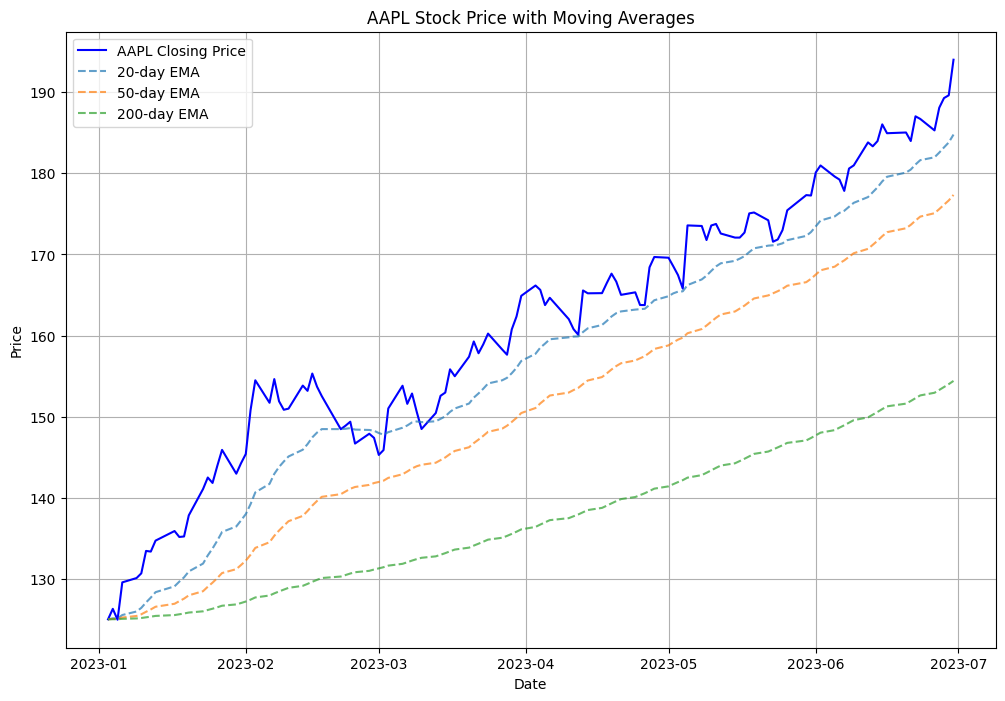

In [15]:
    ticker = 'AAPL'  # Replace 'AAPL' with any stock ticker you want to fetch
    start_date = '2023-01-01'
    end_date = '2023-07-01'
    window_sizes = [20, 50, 200]  # List of moving average window sizes

    stock_data = fetch_stock_data(ticker, start_date, end_date)
#     print(stock_data.tail())  # Print the last few rows of the data fetched

    moving_averages = calculate_moving_averages(stock_data, window_sizes)
#     print(stock_data.tail())  # Print the last few rows of the data with moving averages

    plot_stock_data(stock_data, ticker, moving_averages)

# Envelopes

In [16]:
def calculate_envelopes(data, ema_window, percentage):
    data[f'{ema_window}EMA'] = data['Close'].ewm(span=ema_window, adjust=False).mean()
    data['UpperEnvelope'] = data[f'{ema_window}EMA'] * (1 + percentage / 100)
    data['LowerEnvelope'] = data[f'{ema_window}EMA'] * (1 - percentage / 100)
    return data

def plot_envelopes(data, ticker, ema_window, percentage):
    plt.figure(figsize=(12, 8))

    plt.plot(data.index, data['Close'], label=f'{ticker} Closing Price', color='blue')
    plt.plot(data.index, data[f'{ema_window}EMA'], label=f'{ema_window}-day EMA', alpha=0.7, linestyle='dashed')
    plt.plot(data.index, data['UpperEnvelope'], label=f'Upper Envelope ({percentage}%)', color='green', alpha=0.7)
    plt.plot(data.index, data['LowerEnvelope'], label=f'Lower Envelope ({percentage}%)', color='red', alpha=0.7)

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'{ticker} Stock Price with Envelopes ({ema_window}-day EMA)')
    plt.legend()
    plt.grid()
    plt.show()

[*********************100%***********************]  1 of 1 completed


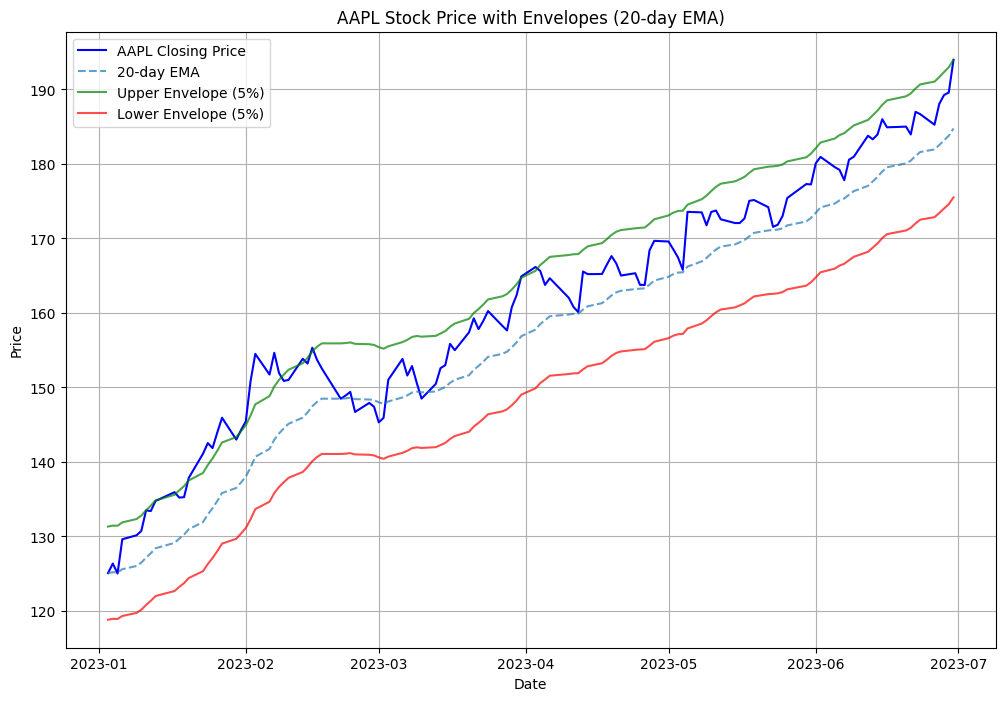

In [18]:
ticker = 'AAPL'  # Replace 'AAPL' with any stock ticker you want to fetch
start_date = '2023-01-01'
end_date = '2023-07-01'
ema_window = 20  # EMA window size
percentage = 5  # Percentage for the envelopes

stock_data = fetch_stock_data(ticker, start_date, end_date)
# print(stock_data.tail())  # Print the last few rows of the data fetched

stock_data_with_envelopes = calculate_envelopes(stock_data, ema_window, percentage)
# print(stock_data_with_envelopes.tail())  # Print the last few rows of the data with envelopes

plot_envelopes(stock_data_with_envelopes, ticker, ema_window, percentage)

# Bollinger Bands

In [19]:
def calculate_bollinger_bands(data, window_size, k):
    data['SMA'] = data['Close'].rolling(window=window_size).mean()
    data['UpperBand'] = data['SMA'] + k * data['Close'].rolling(window=window_size).std()
    data['LowerBand'] = data['SMA'] - k * data['Close'].rolling(window=window_size).std()
    return data

def plot_bollinger_bands(data, ticker, window_size, k):
    plt.figure(figsize=(12, 8))

    plt.plot(data.index, data['Close'], label=f'{ticker} Closing Price', color='blue')
    plt.plot(data.index, data['SMA'], label=f'{window_size}-day SMA', alpha=0.7, linestyle='dashed')
    plt.plot(data.index, data['UpperBand'], label=f'Upper Bollinger Band ({k} std)', color='green', alpha=0.7)
    plt.plot(data.index, data['LowerBand'], label=f'Lower Bollinger Band ({k} std)', color='red', alpha=0.7)

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'{ticker} Stock Price with Bollinger Bands ({window_size}-day SMA)')
    plt.legend()
    plt.grid()
    plt.show()

[*********************100%***********************]  1 of 1 completed


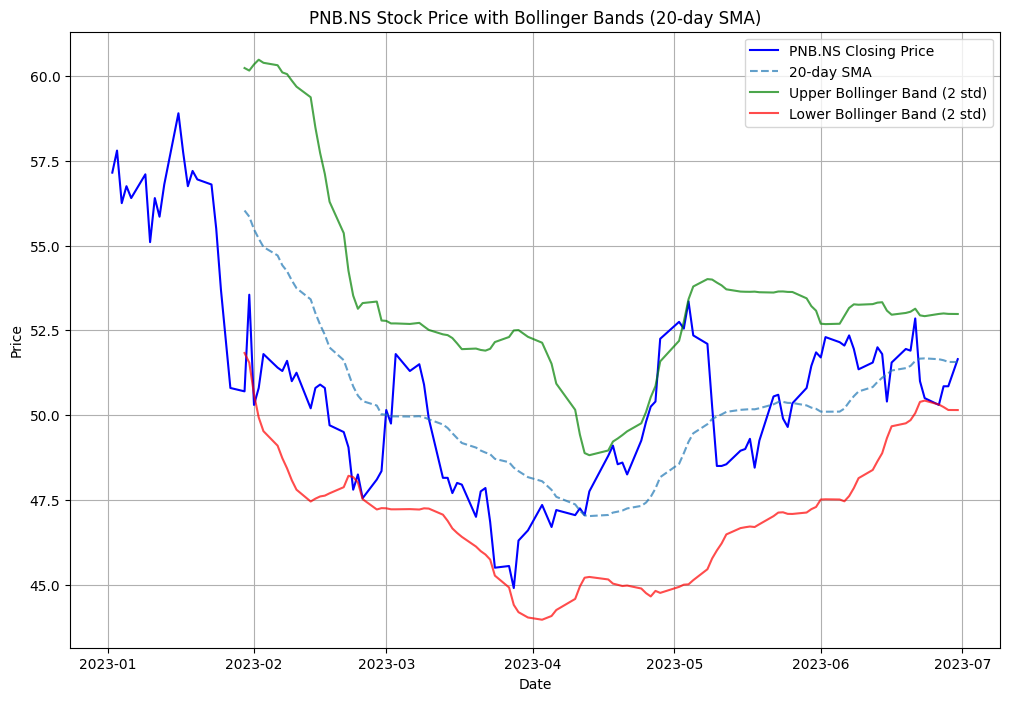

In [22]:
ticker = 'PNB.NS'  # Replace 'AAPL' with any stock ticker you want to fetch
start_date = '2023-01-01'
end_date = '2023-07-01'
window_size = 20  # SMA window size
k = 2  # Standard deviation factor for Bollinger Bands

stock_data = fetch_stock_data(ticker, start_date, end_date)
# print(stock_data.tail())  # Print the last few rows of the data fetched

stock_data_with_bollinger_bands = calculate_bollinger_bands(stock_data, window_size, k)
# print(stock_data_with_bollinger_bands.tail())  # Print the last few rows of the data with Bollinger Bands

plot_bollinger_bands(stock_data_with_bollinger_bands, ticker, window_size, k)